In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(["science", "notebook", "grid", "dark_background"])
from dataclasses import dataclass
from matplotlib.animation import FuncAnimation

# Basic Plotting
---

In [3]:
_ = np.linspace(-1, 1, 100)
xv, yv = np.meshgrid(_, _)   
zv = lambda xv, yv, n, m : np.abs(np.sin(n*np.pi*xv) * np.sin(m*np.pi*yv) - 
                           np.sin(n*np.pi*yv) * np.sin(m*np.pi*xv)) 

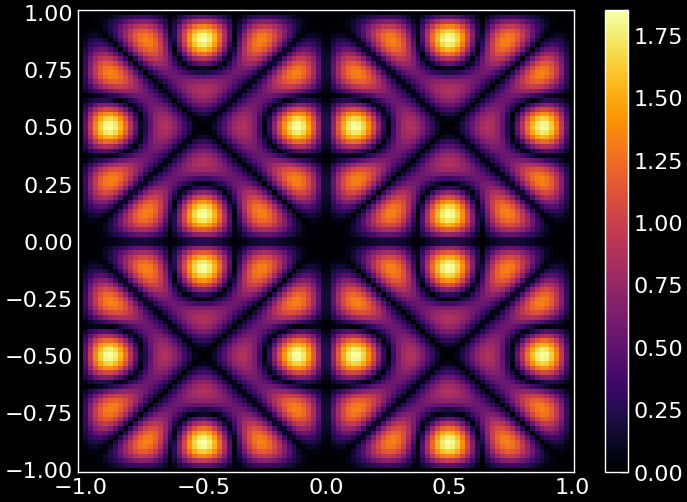

In [4]:
plt.pcolormesh(xv, yv, zv(xv, yv, 3, 5), cmap = "inferno")
plt.colorbar()

# Sand Class
---

In [5]:
class Sand:
    def __init__(self, N_pts : int, delta : float) -> None:
        self.N_pts = N_pts
        self.pos = np.random.uniform(-1, 1, (2, self.N_pts))
        self.zv = zv
        self.delta = delta

    def move(self, **amp_params):
        self.theta = np.random.uniform(0, 2*np.pi, self.N_pts)
        self.dr = self.delta * np.array([np.cos(self.theta), np.sin(self.theta)]) \
            * self.zv(*self.pos, **amp_params)/2
        self.prev_pts = np.copy(self.pos)
        self.pos += self.dr

In [65]:
N_pts = 1000
delta = 0.05
ensemble = Sand(N_pts=N_pts, delta=delta)